In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
import pandas as pd

# How to analyze the vibronic spectrum of iodine

The vibronic spectrum of iodine has been in the physical chemistry lab curriculum for decades for a reason: the analysis asks you to dig deep into the interaction 

Your scientific goals are to be able to create a Birge-Sponer plot from your data, and extract parameters for the potential energy curves. In order to achieve those goals you'll also need to learn some new data analysis skills.

This notebook is broken into sections to give you assistance in the different skills you'll need. You can work through it from top to bottom to go through the entire analysis. You can also skip around to just the sections you want more Python assistance with. The table below shows you the different sections of the notebook, as well as the scientific/experimental skills and the Python skills covered in each section.

The steps:

| Step | Scientific learning | Python learning|
| --- | --- | --- |
| Import the data | Understanding the output of the monochromator | working with `loadtxt()`|
| Combine data sets and convert to absorption | Understanding the output of the monochromator | Working with arrays |
| Combine data sets | monochromator | Working with arrays | 
| Find peaks in your spectrum | | working with `findpeaks()`|
| Assign peaks to transitions | What do the quantum numbers mean | Iteratively stepping plotting arrays and editing a DataFrame |
| Make Birge-Sponer plots for both states | What information goes into a Birge-Sponer plot | stuff and things |
| Extract parameters from the Birge-Sponer plots | | |

I think I like this table. It's helping me think about learning goals.




# Importing data

 - [ ] Import the data
 - [ ] Convert the data to absorbance
 - [ ] Combine multiple data sets into one large spectrum
 - [ ] Find peaks
 - [ ] Assign peaks to transitions
 - [ ] Make BS plots for both states
 - [ ] Extract paramters from the BS plots
 - [ ] Compare parameters with published data
 - [ ] Plot potential energy curves
 - [ ] Make submission quality plots

You have two kinds of data files: files which contain data from iodine, and files which contain the background (blanks). We'll start by importing the iodine data.

You likely have more than one data set. To start with, you need to figure out the structure of your datafile, to understand how to open it. You can double click on one of your files in the Jupyter navigation window and it'll open in a new window. When you open it, you'll see that it has three columns: wavelength data, the number of samples, and the intensity at that wavelength. We want to import this datafile, loading each column into a separate array. You can use a line like this:

`data1X, data1N, data1Y = np.loadtxt("[folder name]/[file name]", unpack = True)`

where you'll replace [folder name] and [file name] with the location of your data file.

In the first cell below, import each of your data sets into it's own set of arrays. In the second cell, plot each of your datasets.

(note from me)
Cells below import the five data sets from Chris Cooper S2020 and then do some plotting to see what I've got. Chris took five data sets. The first two were at low resolution. Sets 3, 4, and 5 are high resolution portions of the same spectrum.

In [2]:
data3X, data3N, data3Y = np.loadtxt("data_from_Chris/CC I2 1200 blaze 540 center_1.txt", unpack=True)
data4X, data4N, data4Y = np.loadtxt("data_from_Chris/CC I2 1200 blaze 580 center_1.txt", unpack=True)
data5X, data5N, data5Y = np.loadtxt("data_from_Chris/CC I2 1200 blaze 600 center_1.txt", unpack=True)

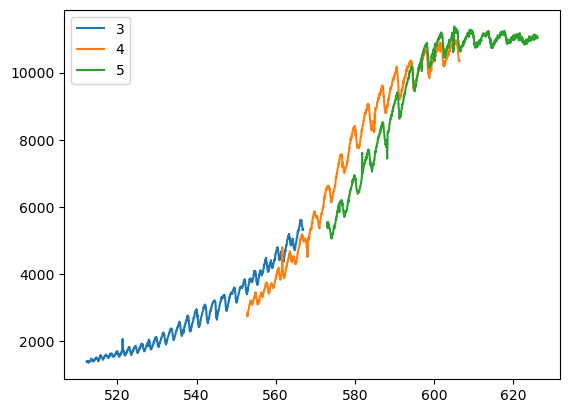

In [3]:
plt.plot(data3X, data3Y)
plt.plot(data4X, data4Y)
plt.plot(data5X, data5Y)
plt.legend(("3", "4", "5"))

Next, you need to import your blanks. To keep things easier to remember, number them the same as the corresponding data files and import them the same way, but this time use the label `blank1X, blank1N, blank1Y` instead of `data1X, data1N, data1Y`. In the cell below, import each blank. Then use the second cell to plot your blanks.

In [4]:
blank3X, blank3N, blank3Y = np.loadtxt("data_from_Chris/CC White light 1200 blaze 540 center_1.txt", unpack=True)
blank4X, blank4N, blank4Y = np.loadtxt("data_from_Chris/CC White light 1200 blaze 580 center_1.txt", unpack=True)
blank5X, blank5N, blank5Y = np.loadtxt("data_from_Chris/CC White light 1200 blaze 600 center_1.txt", unpack=True)

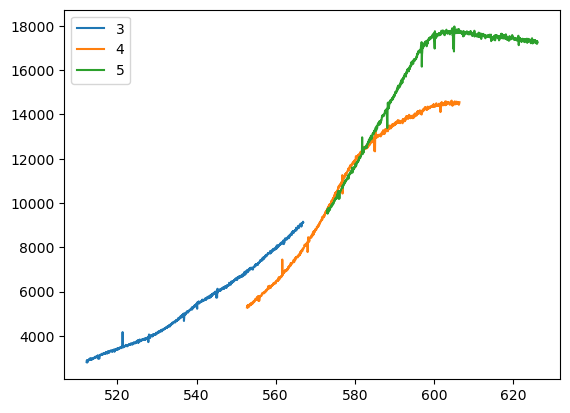

In [5]:
plt.plot(blank3X, blank3Y)
plt.plot(blank4X, blank4Y)
plt.plot(blank5X, blank5Y)
plt.legend(("3", "4", "5"))


# Converting to absorbance

 - [x] Import the data
 - [ ] Convert the data to absorbance
 - [ ] Combine multiple data sets into one large spectrum
 - [ ] Find peaks
 - [ ] Assign peaks to transitions
 - [ ] Make BS plots for both states
 - [ ] Extract paramters from the BS plots
 - [ ] Compare parameters with published data
 - [ ] Plot potential energy curves
 - [ ] Make submission quality plots

Your raw data is proportional to the number of photons absorbed by the CCD at each wavelength. You'll need to convert that to absorbance using the following equation:

$A = log\frac{I_0}{I}$

Here $I_0$ is the intensity of photons without your sample (the blank) and $I$ is the intensity of photons with your sample.

Useful function: `np.log10()`

## How to divide arrays (and many other mathmatical operations on arrays)

One of the big advantages of numpy arrays is that they do what's called elment-wise operations. To explain, here's an example. First, I'll create two arrays:
```
array1 = np.array([1, 2, 3])
array2 = np.array([2, 6, 4])
```

If I add these two arrays together, the result is that the initial element of `array1` gets added to the initial element of `array2` and so on.  So the result of performing `array1 + array2` would be an array containing the numbers `[3, 8, 7]`.

This logic applies to most mathmatical operations. You can do element-wise division this way. You can also apply functions: `np.sin(array1`) will take the sin of each elment of `array1`.

Use the cell below to calculate the absorbtion of each of your spectra, then plot them. You should use the corresponding `data[#]X` array as your horizontal axis when plotting.

In [6]:
abs3 = np.log10(blank3Y/data3Y)
abs4 = np.log10(blank4Y/data4Y)
abs5 = np.log10(blank5Y/data5Y)

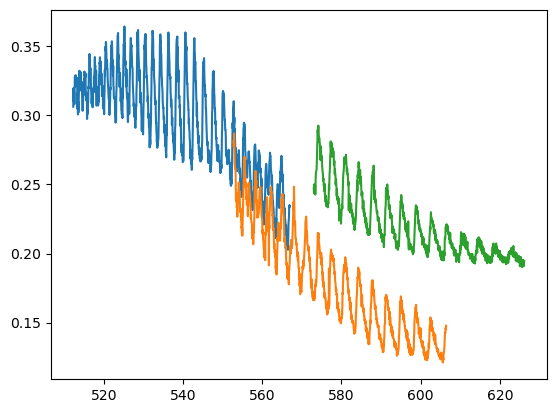

In [7]:
plt.plot(data3X, abs3)
plt.plot(data4X, abs4)
plt.plot(data5X, abs5)

# Combine multiple data sets into one large spectrum

 - [x] Import the data
 - [x] Convert the data to absorbance
 - [ ] Combine multiple data sets into one large spectrum
 - [ ] Find peaks
 - [ ] Assign peaks to transitions
 - [ ] Make BS plots for both states
 - [ ] Extract paramters from the BS plots
 - [ ] Compare parameters with published data
 - [ ] Plot potential energy curves
 - [ ] Make submission quality plots

You'll need to decide which data set(s) you want to analyze. Our monochromator has three different gratings which give three different resolutions. At high resolution, the spectrum is too wide to be acquired at once. The high resolution data will give you better parameters at the end of your analysis. However, the fact that they're in multiple pieces makes it difficult to work with. Below, I'll describe how you can splice together multiple spectra for combined analysis.

First, let's outline the process. You have two (or more) datasets where you want one to move vertically to align with with the other at one particular point, the combine the parts of the arrays on either side of that point.

Imagine you have two datasets Ay and By, with corresponding x arrays Ax and Bx. There is overlap in the ranges of Ax and Bx. One algorithm to imagine combineing these goes as follows:
1. Find where Bx is bigger than the last value of Ax (that is, what is the first element of Bx that doesn't overlap with Ax)
     - Use `np.argwhere(Bx>Ax[-1])`
     - That will return an array. Consider which single value of that array you need. Use an array slice to pull out the value you need
2. Find the difference between the last value of Ay and the value of By at the point found in step 1
3. Shift Bx by that difference
4. Slice Bx and By at the point found in step 1
5. Combine the x and y arrays

In the first cell below, work out the values you need to shift your dataset(s) in order to line up, and find the indices you need to slice at.

In the second cell, plot each dataset, adding in shifts as needed. Verify that you like the overlaps between your datasets.

Once you're hapy with those two cells, use the third cell to slice and combind your arrays. Use syntax like this:
`bigX = np.hstack((Ax[:indexAB], Bx[:indexBC], Cx))`

In [8]:
index45 = np.argwhere(data4X>data5X[0])[0][0]
dif45 = abs5[0] - abs4[index45]

index34 = np.argwhere(data3X>data4X[0])[0][0]
dif34 = abs4[0] - abs3[index34]

Text(0, 0.5, 'Absorption (au)')

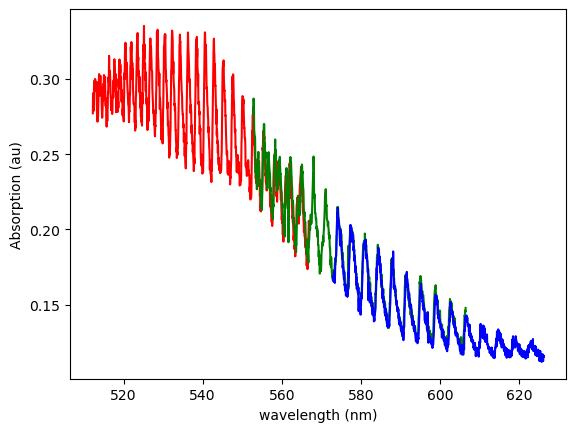

In [9]:
plt.figure(3)
plt.plot(data3X, abs3+dif34, 'r')
plt.plot(data4X, abs4, 'green')
plt.plot(data5X, abs5-dif45, 'blue')
#plt.xlim(555,600)
plt.xlabel("wavelength (nm)")
plt.ylabel("Absorption (au)")

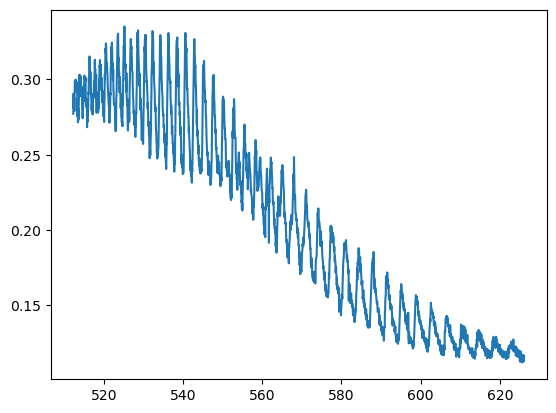

In [10]:
#I like this dataset. I'm going to combine the three arrays into one big array for further work.

bigX = np.hstack((data3X[:index34], data4X[:index45], data5X))
bigY = np.hstack((abs3[:index34]+dif34, abs4[:index45], abs5-dif45))
plt.plot(bigX, bigY)

# Peak finding

The next step is to find the locations of each local maximum. To do this, we'll use `find_peaks()` from Scipy. This function searches for all peaks in a data set. `find_peaks()` returns two objects: an array of peak values, and an array of properties. Figure out how to call `find_peaks()` and save those two arrays in sensibly-named arrays.

Now, this function can find *a lot* of peaks. You can print out how many by looking at `np.shape` on the array of peak locations. We need to adjust some kwargs to just find the peaks we care about, and filter out the noise. To do this, first you'll need to make a graph that shows you what you've got.

Three you should consider are `height`, `distance`, and `prominance`. Call `help(find_peaks)` in a blank cell to learn what these three kwargs do. You'll want to adjust one ore more of those parameters to grab meaningful peaks and ignore noise. Before you do that, let's construct a graph that shows you what you've got.


In the cell below, I start by executing `find_peaks()`, which returns the indices of each peak location. Next, I feed those peaks into the array of x values, to get an array of x values where peaks are.

The final step is to make a plot. It shows the spectrum. It also has a set of vertical lines at each peak location. The y valules of those lines are eyeballed to overlap with the spectrum.

The last line prints out the shape of the peak location array, so that I know how many I have, and what kind of object I have.

What students need to do:
 - [x] Import the data
 - [x] Combine and convert to abs
 - [ ] Find peaks
 - [ ] Assign peaks to transitions
 - [ ] Make BS plots for both states
 - [ ] Extract paramters from the BS plots
 - [ ] Compare parameters with published data
 - [ ] Plot potential energy curves
 - [ ] Make submission quality plots

(59,)


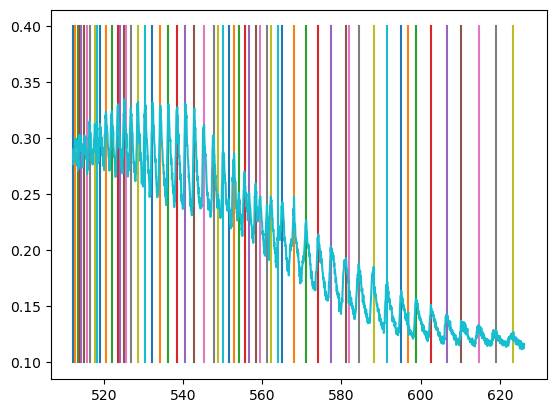

In [11]:
peakValues, peakProps = find_peaks(bigY, prominence = .01)
#peakValues, peakProps = find_peaks(bigY)
peakLocations = bigX[peakValues]
plt.figure(4)
plt.plot((peakLocations, peakLocations), (.1,.4))
plt.plot(bigX, bigY)
print(np.shape(peakLocations))
#plt.xlim([525, 575]) #useful zoom to show some dublets

The next step is to make an object to hold onto the peak assignments. In the cell below, I make a four column pandas data frame. The first colume is the peak locations in nm. The second and third are top and bottom vibrational quantum numbers, initialliy populated with "n/a". THe last one is the peak locations in wavenumbers. And then the actual last one is the peak heights, for annotation purposes later.

In [12]:
peakseries = pd.Series(peakLocations)
waves = pd.Series(10**7/peakLocations)
peaks = pd.DataFrame({
    "location":peakseries,
    "vtop":"n/a",
    "vbot":"n/a",
    "loc_wave":waves,
    })
    #"heights":peakProps["peak_heights"]
#})

### ** This is as far as I've made it in the retype**

What students need to do:

 - [x] Import the data
 - [x] Combine and convert to abs
 - [x] Find peaks
 - [ ] Assign peaks to transitions
 - [ ] Make BS plots for both states
 - [ ] Extract paramters from the BS plots
 - [ ] Compare parameters with published data
 - [ ] Plot potential energy curves
 - [ ] Make submission quality plots
 
Now that I've got an object to hold peak assignments, I need to populate that object. I did this iteratively. What was my procedure?

Start by plotting the spectral region with vbot = 0 three peaks having vertical lines on them. Use `iloc()` to see the range of peaks that correspond to that area. Tentatively assign peaks. Replot with assignments having verticle lines. Change assignments as needed. Then, move the frame to higher/lower numbers, and repeat, until I run out of vbot = 0 peaks. Repeat with the other two.

### Switching to teacher voice here

Alright so we have a dataframe that can hold our peak locations. Now we need to assign the peaks. This manages to be one of those things that's so simple that it's hard. Each individual peak has a v" quantum number for it's ground state vibration, and a v' quantum number for it's excited state vibration. You need to figure out how to identify each peak, then manually assign the peak. This will be iterative, and repetative, and quite possibly annoying.

To start, check the literature and grab the peak values for v"=0. Next, make a plot. On that plot, put your combined spectrum. Then, you're going to make three vertical lines. The easiest way to make a vertical line is to use a plot command, where you manually put in the x and y values, and have the x values be the same. For example, if I wanted a vertical line located at 15.2, that ran from 2 to 2.5, that command would look like this:
`plt.plot((15.2, 15.2), (2, 2.5), 'b')`

I gave it a color as well, because we're going to want to color code our work. Using that syntax, make three vertical lines. They should span across your data, and be located at teh three peaks for v"=0 from the literature. Make them all the same color. (When you repeat this process for v" = 1, you'll pick a new color.)

Finally, use the `plt.xlim()` and `plt.ylim()` functions to zoom your plot so that you can see the area around your three peaks. You should now be able to visually see which three of your peaks correspond to the three literature peaks. More to come below this cell.

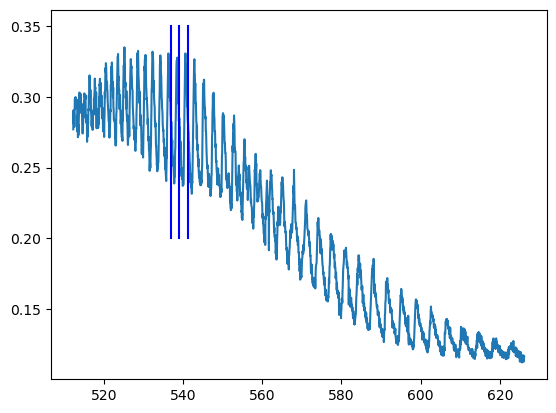

In [13]:
plt.plot(bigX, bigY)
#plt.xlim(580,600)
#plt.ylim(0.1, 0.2)

peaks.iloc[35,1] = 20
peaks.iloc[35,2] = 0
peaks.iloc[7,1] = 41
peaks.iloc[7,2] = 0
peaks.iloc[8,1] = 40
peaks.iloc[8,2] = 0

plt.plot((541.2, 541.2), (.2, .35), 'b')
plt.plot((539, 539), (.2, .35), 'b')
plt.plot((536.9, 536.9), (.2, .35), 'b')

bumpup = 0.005
vbot0 = peaks.query('vbot==0')
#for row_index, row in vbot0.iterrows():
#    print(row["heights"], sep="\n")
#    plt.annotate(row["vtop"], (row["location"], row["heights"]+bumpup), color = 'b')
#plt.xlim(500, 560)

Next, you're going to display a portion of your table, and figure out which peak locations correspond to the three peaks you just visually assigned. We need to pick the correct three rows, and then you'll fill in quantum numbers by manually writing information into those cells. Start by executing the cell below. It's displaying rows 25 to 30 of your data. Manually adjust the index values, until you're seeing the peak locations that correspond to your three peaks. Make a mental note of which three indices correspond to your three assigned peaks.

In [14]:
peaks.iloc[25:30]

,location,vtop,vbot,loc_wave
25,542.841,n/a,n/a,18421.600432
26,545.292,n/a,n/a,18338.798295
27,547.682,n/a,n/a,18258.770600
28,548.821,n/a,n/a,18220.877117
29,550.066,n/a,n/a,18179.636625


In [15]:
peaks.loc[25, "vtop"]

'n/a'

In order to assign peaks, we'll use the `loc` function on our data frame. It'll let us manually write a value into a particular location. For example, if I wanted to write a value of 75 into the vtop for line 1 (don't ask why, because that doesn't make any sense), I would write the following:

`peaks.loc[1, "vtop"] = 75`

Using that syntax, assign the appropriate values to vtop and vbot for your three peaks.

Now we're going to do something nifty. You'll be annoyed at me right now, but you'll thank me for it when it comes time to submit your lab report. We're going to label all assigned peaks with their quantum numbers.

In [16]:
peaks.iloc[4,1] = 43
peaks.iloc[4,2] = 0
peaks.iloc[5,1] = 42
peaks.iloc[5,2] = 0
peaks.iloc[6,1] = "na"
peaks.iloc[6,2] = "na"
peaks.iloc[7,1] = 41
peaks.iloc[7,2] = 0
peaks.iloc[8,1] = 40
peaks.iloc[8,2] = 0
peaks.iloc[9,1] = "na"
peaks.iloc[9,2] = "na"
peaks.iloc[10,1] = 39
peaks.iloc[10,2] = 0
peaks.iloc[11,1] = 38
peaks.iloc[11,2] = 0
peaks.iloc[12,1] = 37
peaks.iloc[12,2] = 0
peaks.iloc[13,1] = 36
peaks.iloc[13,2] = 0
peaks.iloc[14,1] = "na"
peaks.iloc[14,2] = "na"
peaks.iloc[15,1] = 35
peaks.iloc[15,2] = 0
peaks.iloc[16,1] = "na"
peaks.iloc[16,2] = "na"
peaks.iloc[17,1] = 34
peaks.iloc[17,2] = 0
peaks.iloc[18,1] = 33
peaks.iloc[18,2] = 0
peaks.iloc[19,1] = 32
peaks.iloc[19,2] = 0
peaks.iloc[20,1] = 31
peaks.iloc[20,2] = 0
peaks.iloc[21,1] = 30
peaks.iloc[21,2] = 0
peaks.iloc[22,1] = 29
peaks.iloc[22,2] = 0
peaks.iloc[23,1] = 28
peaks.iloc[23,2] = 0
peaks.iloc[24,1] = 27
peaks.iloc[24,2] = 0
peaks.iloc[25,1] = 26
peaks.iloc[25,2] = 0
peaks.iloc[26,1] = 25
peaks.iloc[26,2] = 0
peaks.iloc[27,1] = 24
peaks.iloc[27,2] = 0
peaks.iloc[28,1] = "na"
peaks.iloc[28,2] = "na"
peaks.iloc[29,1] = 23
peaks.iloc[29,2] = 0
peaks.iloc[31,1] = 22
peaks.iloc[31,2] = 0
peaks.iloc[33,1] = 21
peaks.iloc[33,2] = 0
peaks.iloc[35,1] = 20
peaks.iloc[35,2] = 0

peaks.iloc[30,1] = 25
peaks.iloc[30,2] = 1
peaks.iloc[32,1] = 24
peaks.iloc[32,2] = 1
peaks.iloc[34,1] = 23
peaks.iloc[34,2] = 1
peaks.iloc[36,1] = 22
peaks.iloc[36,2] = 1
peaks.iloc[38,1] = 21
peaks.iloc[38,2] = 1
peaks.iloc[40,1] = 20
peaks.iloc[40,2] = 1
peaks.iloc[41,1] = 19
peaks.iloc[41,2] = 1
peaks.iloc[42,1] = 18
peaks.iloc[42,2] = 1
peaks.iloc[43,1] = 17
peaks.iloc[43,2] = 1
peaks.iloc[44,1] = 16
peaks.iloc[44,2] = 1
peaks.iloc[45,1] = 17

peaks.iloc[45,2] = 2
peaks.iloc[46,1] = "nan" #noise peak
peaks.iloc[46,2] = "nan"
peaks.iloc[47,1] = 16
peaks.iloc[47,2] = 2
peaks.iloc[48,1] = 15
peaks.iloc[48,2] = 2
peaks.iloc[49,1] = 14
peaks.iloc[49,2] = 2
peaks.iloc[50,1] = 13
peaks.iloc[50,2] = 2
peaks.iloc[51,1] = "nan"
peaks.iloc[51,2] = "nan"
peaks.iloc[52,1] = 11
peaks.iloc[52,2] = 2
peaks.iloc[53,1] = 10
peaks.iloc[53,2] = 2
peaks.iloc[54,1] = 9
peaks.iloc[54,2] = 2
peaks.iloc[55,1] = 8
peaks.iloc[55,2] = 2
peaks.iloc[56,1] = 7
peaks.iloc[56,2] = 2
peaks.iloc[57,1] = 6
peaks.iloc[57,2] = 2
peaks.iloc[58,1] = 5
peaks.iloc[58,2] = 2

In [17]:
peaks.head()

,location,vtop,vbot,loc_wave
0,512.294,n/a,n/a,19520.041226
1,512.801,n/a,n/a,19500.742003
2,513.364,n/a,n/a,19479.355779
3,513.814,n/a,n/a,19462.295695
4,514.152,43,0,19449.501315


In [18]:
vbot2

NameError: name 'vbot2' is not defined

In [ ]:
plt.figure(figsize = (15,7))
plt.plot(bigX, bigY)

#plt.xlim(580,600)
#plt.ylim(0.1, 0.2)
plt.plot((595.7, 595.7), (.1, .2), 'r')
plt.plot((592.0, 592.0), (.1, .2), 'r')
plt.plot((588.5, 588.5), (.1, .2), 'r')

plt.plot((571.6, 571.6), (.15, .25), 'g')
plt.plot((568.6, 568.6), (.15, .25), 'g')
plt.plot((565.6, 565.5), (.15, .25), 'g')

plt.plot((541.2, 541.2), (.2, .35), 'b')
plt.plot((539, 539), (.2, .35), 'b')
plt.plot((536.9, 536.9), (.2, .35), 'b')


vbot2 = peaks.query('vbot==2')
vbot2locations = np.array(vbot2["location"])
plt.plot((vbot2locations, vbot2locations), (.1, .3), 'k')

vbot1 = peaks.query('vbot==1')
vbot1locations = np.array(vbot1["location"])
plt.plot((vbot1locations, vbot1locations), (.1, .3), 'c')

vbot0 = peaks.query('vbot==0')
vbot0locations = np.array(vbot0["location"])
plt.plot((vbot0locations, vbot0locations), (.15, .35), 'purple')

plt.xlim(530, 625)

In [ ]:
vbot0.head()

In [ ]:
# The peak around 581 showed up twice. I'm checking spacing here to decide which one is a noise peak.
print(peaks.iloc[49,0]-peaks.iloc[48,0])
print(peaks.iloc[48,0]-peaks.iloc[47,0])
print(peaks.iloc[47,0]-peaks.iloc[46,0])
print(peaks.iloc[47,0]-peaks.iloc[45,0])

Alright now that I've got peak assignments, I need to flip to wavenumbers and make a BS plot and a DS table.

BS plot: dif between the thing and the thing next to it vs the quantum number

In [ ]:
vbot0.iloc[1,1]

In [ ]:

numpeaks = vbot0.shape[0]
bs0 = np.array([])
vib0 = np.array([])
for i in range(1,numpeaks): #ignore the first one row
    bs0=np.append(bs0, vbot0.iloc[i-1, 3]-vbot0.iloc[i,3])
    vib0 = np.append(vib0, vbot0.iloc[i, 1])
    

numpeaks = vbot1.shape[0]
bs1 = np.array([])
vib1 = np.array([])
for i in range(1,numpeaks): #ignore the first one row
    bs1=np.append(bs1, vbot1.iloc[i-1, 3]-vbot1.iloc[i,3])
    vib1 = np.append(vib1, vbot1.iloc[i, 1])

numpeaks = vbot2.shape[0]
bs2 = np.array([])
vib2 = np.array([])
for i in range(1,numpeaks): #ignore the first one row
    bs2=np.append(bs2, vbot2.iloc[i-1, 3]-vbot2.iloc[i,3])
    vib2 = np.append(vib2, vbot2.iloc[i, 1])
    
plt.plot(vib0, bs0)
plt.plot(vib1, bs1)
plt.plot(vib2, bs2)
plt.ylim(0,200)
